# ESTIMATING "RELATIVE PHYSICAL FATIGUE INDEX" OF PLAYERS USING ICE HOCKEY METRICS

#### **Objective:** To develop an application that enables coaches to input match data and obtain instant feedback on potential fatigue levels,based on the dataset's metrics.

#### **Functionality:** Upload data files and obtain instant feedback on potential fatigue levels.

#### **Applications:**

1. **Player Management and Rotation:**
   Use the Fatigue Index (FI) to guide real-time player rotation decisions, optimizing performance and minimizing injury risks.

2. **Injury Prevention in Training:**
   Incorporate FI to tailor training intensity and recovery, reducing the likelihood of player injuries.

3. **Performance Analysis and Strategy:**
   Integrate FI with performance metrics to refine game strategies, making informed in-game decisions for optimal outcomes.


### DATA LOADING AND PREPROCESSING


In [101]:
# Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# Load the Original Datasets
lugano = pd.read_csv("LUGANO-ORIG.csv", encoding="ISO-8859-1", sep=";")
zsc = pd.read_csv("ZHC-ORIG.csv", encoding="ISO-8859-1", sep=";")

In [103]:
# We change the delimiter to ',' rename and save the file for ease of use
lugano.to_csv("lhc-lugano.csv", sep=",", index=False)
zsc.to_csv("lhc-zsc.csv", sep=",", index=False)

In [104]:
# Load the updated datasets into Pandas DataFrame
df_lugano = pd.read_csv("lhc-lugano.csv", encoding="ISO-8859-1")
df_zsc = pd.read_csv("lhc-zsc.csv", encoding="ISO-8859-1")

#### Filtering the dataset to include only the relevant columns


In [105]:
# List of columns to keep in the dataset
columns_to_keep = [
    "Group name",
    "Position",
    "Description",
    "Duration (s)",
    "Distance (m)",
    "Time on Ice (s)",
    "High Metabolic Power Distance (m)",
    "Mechanical Intensity",
]


# Function to filter the columns
def filter_columns(df, columns_to_keep):
    """
    Filters a DataFrame to only include specified columns.

    Parameters:
    - df (pd.DataFrame): The original DataFrame.
    - columns_to_keep (list of str): List of column names to keep.

    Returns:
    - pd.DataFrame: A new DataFrame with only the specified columns.
    """
    return df[columns_to_keep]


# Example usage:
df_imp_lugano = filter_columns(df_lugano, columns_to_keep)
df_imp_zsc = filter_columns(df_zsc, columns_to_keep)

# Print the first 5 rows of the datasets
print(df_imp_lugano.head())

print(
    "===================================================================================================="
)

print(df_imp_zsc.head())

  Group name Position Description  Duration (s)  Distance (m)  \
0    Defense        D   vs Lugano          8836          3163   
1    Offense        F   vs Lugano          8836          2881   
2    Offense        F   vs Lugano          8836          3586   
3    Offense        F   vs Lugano          8836          3881   
4    Defense        D   vs Lugano          8836           354   

   Time on Ice (s)  High Metabolic Power Distance (m) Mechanical Intensity  
0             1038                               1287                45,94  
1              689                               1724                42,85  
2              932                               2090                46,12  
3             1043                               1956                44,38  
4               92                                179                44,95  
     Group name Position Description  Duration (s)  Distance (m)  \
0       Defense        D   vs Zurich          7868          3140   
1       Off

#### Handling missing values


In [106]:
# Check if any NA in Each Row and column of the dataframes
print(df_imp_lugano.isnull().sum(axis=0))
# df_imp_lugano.isna().any(axis=1)

# We see there are no NA values in the match dataframe

print(
    "============================================================================================================="
)
# Check if any NA in Each Column of the dataframe
print(df_imp_zsc.isnull().sum(axis=0))

# We see 14 and 7, NA values in the column "Mechanical Intensity" in the two dataframes respectively

Group name                            0
Position                              0
Description                           0
Duration (s)                          0
Distance (m)                          0
Time on Ice (s)                       0
High Metabolic Power Distance (m)     0
Mechanical Intensity                 14
dtype: int64
Group name                           0
Position                             0
Description                          0
Duration (s)                         0
Distance (m)                         0
Time on Ice (s)                      0
High Metabolic Power Distance (m)    0
Mechanical Intensity                 7
dtype: int64


In [107]:
# Remove the rows with NA values in the column "Mechanical Intensity"
df_imp_lugano = df_imp_lugano.dropna(subset=["Mechanical Intensity"])

df_imp_zsc = df_imp_zsc.dropna(subset=["Mechanical Intensity"])

# Check if any NA in Each Column of the dataframe
print(df_imp_lugano.isnull().sum(axis=0))
print(df_imp_lugano.shape)

print(
    "============================================================================================================="
)

print(df_imp_zsc.isnull().sum(axis=0))
print(df_imp_zsc.shape)

Group name                           0
Position                             0
Description                          0
Duration (s)                         0
Distance (m)                         0
Time on Ice (s)                      0
High Metabolic Power Distance (m)    0
Mechanical Intensity                 0
dtype: int64
(89, 8)
Group name                           0
Position                             0
Description                          0
Duration (s)                         0
Distance (m)                         0
Time on Ice (s)                      0
High Metabolic Power Distance (m)    0
Mechanical Intensity                 0
dtype: int64
(161, 8)


#### Creating a function to remove irrelevant rows or 'Players'


In [108]:
# Function to remove rows where the value of column Group name is not equal to 'Offense' or 'Defense'
# This is done to remove the rows for the guest team present in the ZSC dataset


def filter_group_name(df):
    """
    Filters the DataFrame to retain rows where 'Group name' is 'Offense' or 'Defense'.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The filtered DataFrame.
    """
    return df[df["Group name"].isin(["Offense", "Defense", "Goalies"])]


# Example usage:
df_filtered_zsc = filter_group_name(df_imp_zsc)

df_filtered_lugano = filter_group_name(df_imp_lugano)

# Display the filtered data:
# df_filtered_zsc

# Display the filtered data:
df_filtered_lugano

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity
0,Defense,D,vs Lugano,8836,3163,1038,1287,"45,94"
1,Offense,F,vs Lugano,8836,2881,689,1724,"42,85"
2,Offense,F,vs Lugano,8836,3586,932,2090,"46,12"
3,Offense,F,vs Lugano,8836,3881,1043,1956,"44,38"
4,Defense,D,vs Lugano,8836,354,92,179,"44,95"
...,...,...,...,...,...,...,...,...
93,Offense,F,Overtime,129,254,51,180,"38,32"
94,Defense,D,Overtime,129,92,27,12,"25,67"
97,Defense,D,Overtime,129,235,46,148,"32,33"
99,Offense,F,Overtime,129,228,48,131,"43,6"


#### Adding the Player ID only to the rows with Column 'Description' = 'vs Lugano' or 'vs Zurich' i.e. Game data only, NOT periods


In [109]:
def add_player_id(df):
    """
    Adds a new column 'Player ID' to the DataFrame starting from 1, but only to the rows
    with 'Description' as 'vs Lugano' or 'vs Zurich'.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The DataFrame with the new 'Player ID' column added to specific rows.
    """
    mask = df["Description"].isin(["vs Lugano", "vs Zurich"])
    df.loc[mask, "Player ID"] = list(range(1, sum(mask) + 1))
    df["Player ID"] = df["Player ID"].astype(
        "Int64"
    )  # Using Int64 to handle potential NaNs
    return df


# Example usage:
df_imp_lugano = add_player_id(df_filtered_lugano)
df_imp_zsc = add_player_id(df_filtered_zsc)

# Displaying the first 7 rows:
print(df_imp_lugano.head(7))

print(
    "============================================================================================================="
)

print(df_imp_zsc.head(7))

  Group name    Position Description  Duration (s)  Distance (m)  \
0    Defense           D   vs Lugano          8836          3163   
1    Offense           F   vs Lugano          8836          2881   
2    Offense           F   vs Lugano          8836          3586   
3    Offense           F   vs Lugano          8836          3881   
4    Defense           D   vs Lugano          8836           354   
5    Defense           D   vs Lugano          8836          5087   
6    Goalies  Goalkeeper   vs Lugano          8836          1066   

   Time on Ice (s)  High Metabolic Power Distance (m) Mechanical Intensity  \
0             1038                               1287                45,94   
1              689                               1724                42,85   
2              932                               2090                46,12   
3             1043                               1956                44,38   
4               92                                179            

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1598695549.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1598695549.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Check the data types of the columns


In [110]:
# Check the data types of the columns
print(df_imp_lugano.dtypes)

print(
    "============================================================================================================="
)

print(df_imp_zsc.dtypes)

Group name                           object
Position                             object
Description                          object
Duration (s)                          int64
Distance (m)                          int64
Time on Ice (s)                       int64
High Metabolic Power Distance (m)     int64
Mechanical Intensity                 object
Player ID                             Int64
dtype: object
Group name                           object
Position                             object
Description                          object
Duration (s)                          int64
Distance (m)                          int64
Time on Ice (s)                       int64
High Metabolic Power Distance (m)     int64
Mechanical Intensity                 object
Player ID                             Int64
dtype: object


#### Convert the data type of the column mechanical intensity from string to float


In [111]:
def convert_mechanical_intensity_to_float(df):
    """
    Converts the data type of the 'Mechanical Intensity' column from string to float.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The DataFrame with the 'Mechanical Intensity' column converted to float.
    """
    df["Mechanical Intensity"] = (
        df["Mechanical Intensity"].str.replace(",", ".").astype(float)
    )
    return df


# Example usage:
df_imp_lugano = convert_mechanical_intensity_to_float(df_imp_lugano)
df_imp_zsc = convert_mechanical_intensity_to_float(df_imp_zsc)

# Checking the data types:
print(df_imp_lugano.dtypes)

print(
    "============================================================================================================="
)

print(df_imp_zsc.dtypes)

Group name                            object
Position                              object
Description                           object
Duration (s)                           int64
Distance (m)                           int64
Time on Ice (s)                        int64
High Metabolic Power Distance (m)      int64
Mechanical Intensity                 float64
Player ID                              Int64
dtype: object
Group name                            object
Position                              object
Description                           object
Duration (s)                           int64
Distance (m)                           int64
Time on Ice (s)                        int64
High Metabolic Power Distance (m)      int64
Mechanical Intensity                 float64
Player ID                              Int64
dtype: object


### CONCEPTUAL FRAMEWORK AND METHODOLOGY

Given the anonymized nature and the small sample size of our dataset, combined with numerous variables at play, we've made certain assumptions to ensure its suitable for our use-case. Here’s our approach to understanding player fatigue:

1. **Picking Player Data:**
   Due to lack of player identification data, we had to infer that first 21 rows represent individual player data. This is based on the understanding that a hockey team typically consists of 20 players. This selection ensures we capture data for each unique player.

2. **Identifying Player Roles:**
   We assess the 'Position' column to differentiate between a forward (FW), defenseman (D) and Goalkeeper. The roles they play on the ice rink might result in different fatigue levels.

3. **Data Segmentation:**
   With hundreds of variables present, we narrow down and segment data by recommended metrics from the icehockey club. This targeted analysis aids in the precise estimation of the Fatigue Index (FI).

4. **Developing the Fatigue Formula:**
   Using a combination of the dataset metrics, we create a formula that captures the aspects of player fatigue. This formula is designed to be sensitive to player roles, game dynamics, and other key factors.

5. **Fatigue Estimation:**
   Using the curated data from the previous steps, we derive the Fatigue Index (FI).

6. **Visualization:**
   We design a clear and easy-to-understand graphic to show the fatigue levels. This helps coaches quickly see and understand player tiredness.


#### Create a function to filter the dataset based on the Period or the full game


In [112]:
# As we want only unique player data, we can safely select the game data i.e rows with Description = "vs Lugano"
# We can infer that because an ice hockey team typically consists of 20 players, including 2 goaltenders and 18 skaters.
# and "vs Lugano" implies that that row is for the match data NOT period data.
# and the proportion of forwards to defensemen


def filter_period_data(df, description):
    """
    Filters the DataFrame based on the given description.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - description (str): The description to filter by. Can be '1st Period', '2nd Period', '3rd Period' or 'vs Lugano' or 'vs Zurich'.

    Returns:
    - pd.DataFrame: The filtered DataFrame.
    """
    return df[df["Description"] == description]


# Example usage:
df_imp_lugano_game = filter_period_data(df_imp_lugano, "vs Lugano")
df_imp_zsc_game = filter_period_data(df_imp_zsc, "vs Zurich")

# Display the filtered data:
# print(df_imp_lugano_match)

print(
    "============================================================================================================="
)

print(df_imp_zsc_game)

print(df_imp_lugano_game)

   Group name    Position Description  Duration (s)  Distance (m)  \
0     Defense           D   vs Zurich          7868          3140   
1     Offense           F   vs Zurich          7868          3037   
2     Offense           F   vs Zurich          7868          4872   
10    Offense           F   vs Zurich          7868          3648   
11    Offense           F   vs Zurich          7868          2747   
12    Defense           D   vs Zurich          7868          1324   
28    Defense           D   vs Zurich          7868          3048   
29    Goalies  Goalkeeper   vs Zurich          7868          1124   
30    Offense           F   vs Zurich          7868          4376   
31    Offense           F   vs Zurich          7868          3824   
32    Defense           D   vs Zurich          7868          4242   
33    Defense           D   vs Zurich          7868          4327   
34    Defense           F   vs Zurich          7868          1574   
35    Offense           F   vs Zur

In [113]:
# Calculate the ratio of forwards to defensemen using position column

df_imp_lugano_game["Position"].value_counts()

Position
F             14
D              6
Goalkeeper     1
Name: count, dtype: int64

In [114]:
# Calculate ratio of F to D
F = df_imp_lugano_game["Position"].value_counts()[0]
D = df_imp_lugano_game["Position"].value_counts()[1]
ratio = F / D

# print ratio as a fraction

print(ratio)

2.3333333333333335


C:\Users\samue\AppData\Local\Temp\ipykernel_11196\2978978911.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\2978978911.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### CREATING A RELATIVE FATIGUE LEVEL FORMULA

- Typically involves empirical research, biomechanics, and physiological considerations.
- However, we propose a simple, hypothetical formula to estimate fatigue.
- DISCLAIMER : This is a rough estimation and not based on scientific research.
- Using the important metrics recommended by the Ice Hockey Club & Professor Martin Rumo, we attempt to create a formula that can be used to estimate fatigue levels.


#### Relative Fatigue Index (RFI) = [A * (Time on ice/ Match Duration) + B * (High Metabolic Power Distance / Total Distance) + C * (Mechanical Intensity)]

- TIME FACTOR : Percentage of Time spent on Ice. Here, the idea is simple: the more time a player spends on the ice, the more fatigued they're likely to be.

- DISTANCE OR INTENSITY FACTOR : Percentage of the distance covered at high intensities. It's a straightforward indicator of how hard a player pushed themselves relative to their overall activity. It is the distance covered at high metabolic power divided by the total distance covered.

- MECHANICAL OR LOAD INTENSITY : How intense a player's session was concerning accelerations and decelerations.It models the intensity of a session or phase and provides important information about its impact on the lower limbs. It is the Mechanical Load divided by the total time in minutes.

- A, B, and C: Weights assigned to each of the factors. These weights are determined by the coach based on the importance of each factor in the context of the team's strategy and the coach's philosophy.


### FOR MATCH DATA


#### NORMALIZE MECHANICAL INTENSITY (MATCH DATA)


In [115]:
# First we need to normalize the Mechanical Intensity column, so that the values are between 0 and 1
# This is to make sure that it can be added to TIME FACTOR, and DISTANCE FACTOR which are ratios in the next step
# With historical data, from the clubs, min and max intensities can be adjusted further in the future to normalize the intensity

min_val = df_imp_lugano_game["Mechanical Intensity"].min()
max_val = df_imp_lugano_game["Mechanical Intensity"].max()

df_imp_lugano_game["Normalized Mechanical Intensity"] = (
    df_imp_lugano_game["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_imp_lugano_game

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3176864924.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity
0,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,1,0.961371
1,Offense,F,vs Lugano,8836,2881,689,1724,42.85,2,0.871624
2,Offense,F,vs Lugano,8836,3586,932,2090,46.12,3,0.966599
3,Offense,F,vs Lugano,8836,3881,1043,1956,44.38,4,0.916062
4,Defense,D,vs Lugano,8836,354,92,179,44.95,5,0.932617
5,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,6,0.825733
6,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,7,0.187337
7,Offense,F,vs Lugano,8836,4683,1162,2758,44.56,8,0.921290
8,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,9,0.748766
9,Defense,D,vs Lugano,8836,4383,1307,1913,45.25,10,0.941330


#### CREATE RELATIVE FATIGUE INDEX (RFI) FUNCTION


In [116]:
def fatigue_index(df, A=1, B=1, C=1):
    """This function calculates the fatigue index for each player."""
    return (
        A * (df["Time on Ice (s)"] / df["Duration (s)"])
        + B * df["High Metabolic Power Distance (m)"] / df["Distance (m)"]
    ) + C * df["Normalized Mechanical Intensity"]


# test the function
A = 1
B = 1
C = 1

fatigue_index(df_imp_lugano_game, A, B, C)

0     1.485737
1     1.548003
2     1.654899
3     1.538095
4     1.448679
5     1.471295
6     0.647389
7     1.641736
8     1.404328
9     1.525707
10    1.669477
11    0.951123
12    1.532141
13    0.001019
14    1.403397
15    1.548994
16    1.517963
17    1.519416
18    1.453339
19    1.443519
20    1.616113
dtype: float64

#### FATIGUE INDEX CALCULATION (MATCH DATA)


In [117]:
# 1. Compute the intermediate fatigue index for each row
df_imp_lugano_game["Fatigue Index"] = df_imp_lugano_game.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_imp_lugano_game["Fatigue Index"].min()
max_fatigue = df_imp_lugano_game["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_imp_lugano_game["Normalized Fatigue Index"] = (
    df_imp_lugano_game["Fatigue Index"] - min_fatigue
) / (max_fatigue - min_fatigue) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_imp_lugano_game_sorted = df_imp_lugano_game.sort_values(
    by="Normalized Fatigue Index", ascending=True
)

df_imp_lugano_game_sorted

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3176384214.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3176384214.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
13,Offense,F,vs Lugano,8836,21,9,0,12.84,14,0.000000,0.001019,1.000000
6,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,7,0.187337,0.647389,1.387406
11,Defense,D,vs Lugano,8836,4771,1396,1499,29.33,12,0.478943,0.951123,1.569450
14,Defense,D,vs Lugano,8836,5223,1485,2555,38.53,15,0.746152,1.403397,1.840523
8,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,9,0.748766,1.404328,1.841081
19,Offense,F,vs Lugano,8836,2595,609,1465,40.73,20,0.810049,1.443519,1.864571
4,Defense,D,vs Lugano,8836,354,92,179,44.95,5,0.932617,1.448679,1.867663
18,Offense,F,vs Lugano,8836,4039,1034,2047,41.40,19,0.829509,1.453339,1.870456
5,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,6,0.825733,1.471295,1.881218
0,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,1,0.961371,1.485737,1.889874


#### CREATE FUNCTION TO CALCULATE THE FATIGUE INDEX FOR EACH PLAYER


#### COLOR CATEGORIZATION OF FATIGUE LEVELS


In [118]:
# MANUAL THRESHOLD BASED CATEGORIZATION OF FATIGUE INDEX

# Fixed thresholds
high_threshold = 1.57
low_threshold = 1


# Categorize values based on manual thresholds
df_imp_lugano_game_sorted["Fatigue Category"] = pd.cut(
    df_imp_lugano_game_sorted["Fatigue Index"],
    [0, low_threshold, high_threshold, 2],  # Explicitly using 2 as max value
    labels=["Low", "Medium", "High"],
    include_lowest=True,
)

# Display the results

df_imp_lugano_game_sorted.head(
    21
)  # [["Player ID", "Relative Fatigue Index", "Fatigue Category"]]

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index,Fatigue Category
13,Offense,F,vs Lugano,8836,21,9,0,12.84,14,0.000000,0.001019,1.000000,Low
6,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,7,0.187337,0.647389,1.387406,Low
11,Defense,D,vs Lugano,8836,4771,1396,1499,29.33,12,0.478943,0.951123,1.569450,Low
14,Defense,D,vs Lugano,8836,5223,1485,2555,38.53,15,0.746152,1.403397,1.840523,Medium
8,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,9,0.748766,1.404328,1.841081,Medium
19,Offense,F,vs Lugano,8836,2595,609,1465,40.73,20,0.810049,1.443519,1.864571,Medium
4,Defense,D,vs Lugano,8836,354,92,179,44.95,5,0.932617,1.448679,1.867663,Medium
18,Offense,F,vs Lugano,8836,4039,1034,2047,41.40,19,0.829509,1.453339,1.870456,Medium
5,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,6,0.825733,1.471295,1.881218,Medium
0,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,1,0.961371,1.485737,1.889874,Medium


#### VISUALIZATION OF FATIGUE INDEX FOR EACH PLAYER


In [119]:
import plotly.express as px

# Sort the dataframe by 'Normalized Fatigue Index'
df_imp_lugano_match_sorted = df_imp_lugano_game_sorted.sort_values(
    by="Normalized Fatigue Index"
)

# Reset the 'Player ID' based on this sorted order
df_imp_lugano_game_sorted["Player ID"] = range(1, len(df_imp_lugano_match_sorted) + 1)

# Define a color map for the fatigue categories
color_map = {
    "Low": "#66FF66",  # Darker Green
    "Medium": "#FFFF66",  # Darker Yellow
    "High": "#FF6666",  # Darker Red
}
df_imp_lugano_game_sorted["Color"] = df_imp_lugano_game_sorted["Fatigue Category"].map(
    color_map
)

# Create an interactive bar plot using Plotly
fig = px.bar(
    df_imp_lugano_game_sorted,
    x="Player ID",
    y="Normalized Fatigue Index",
    color="Fatigue Category",
    color_discrete_map=color_map,
    title="Normalized Fatigue Index of Players",
    labels={"Normalized Fatigue Index": "Normalized Fatigue Index"},
    category_orders={"Fatigue Category": ["Low", "Medium", "High"]},
)

# Customize the layout
fig.update_layout(
    xaxis_title="Player ID",
    xaxis_tickvals=df_imp_lugano_game_sorted["Player ID"].tolist(),
    yaxis_title="Normalized Fatigue Index",
    font=dict(family="Arial", size=14),
    legend_title="Fatigue Category",
    legend=dict(
        title_font=dict(size=14),
        font=dict(size=12),
        x=0.30,
        y=1.0,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="black",
        borderwidth=1,
        orientation="h",
    ),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickvals=[i * 0.25 + 0.75 for i in range(6)], tickfont=dict(size=12)),
    yaxis_range=[0.75, 2.25],
)

# Add text labels for positions above the x-axis
for index, position in enumerate(df_imp_lugano_game_sorted["Position"]):
    fig.add_annotation(
        text=position,
        x=index,
        xshift=45,
        y=0.8,
        showarrow=False,
        font=dict(size=12, color="black"),
    )

# Show the interactive plot
fig.show()

c:\Users\samue\switchdrive\SyncVM\MscIds Course Materials\3rd Semester\Sport Data Analytics\SDA-code\ice-venv\lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



c:\Users\samue\switchdrive\SyncVM\MscIds Course Materials\3rd Semester\Sport Data Analytics\SDA-code\ice-venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\samue\switchdrive\SyncVM\MscIds Course Materials\3rd Semester\Sport Data Analytics\SDA-code\ice-venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



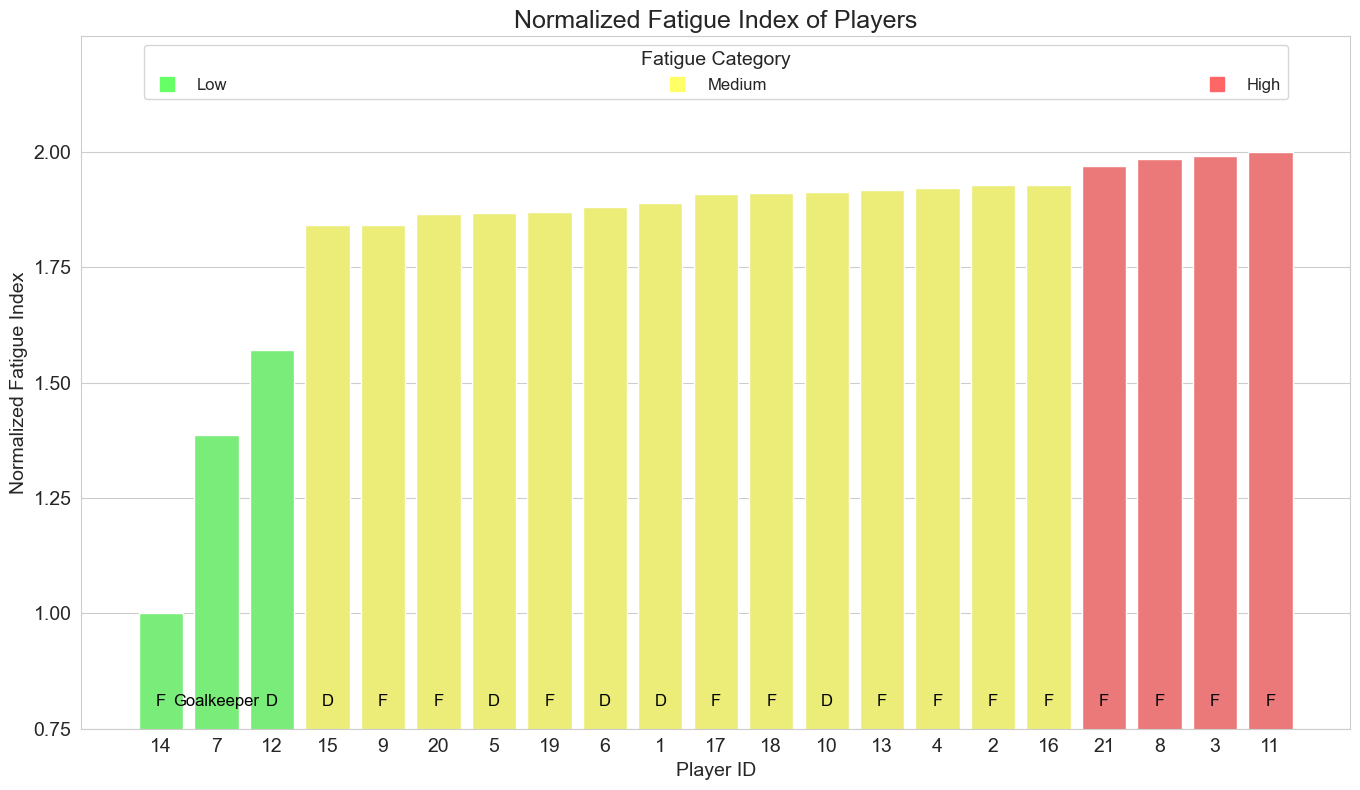

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the color palette for the bars based on fatigue categories
color_map = {
    "Low": "#66FF66",  # Darker Green
    "Medium": "#FFFF66",  # Darker Yellow
    "High": "#FF6666",  # Darker Red
}
colors = df_imp_lugano_match_sorted["Fatigue Category"].map(color_map)

# Plotting the data
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Using the 'order' parameter to ensure bars are plotted in the correct ascending order
bar_plot = sns.barplot(
    x="Player ID",
    y="Normalized Fatigue Index",
    data=df_imp_lugano_match_sorted,
    palette=colors,
    order=df_imp_lugano_match_sorted["Player ID"],
)
plt.title("Normalized Fatigue Index of Players", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Normalized Fatigue Index", fontsize=14)
plt.yticks([i for i in range(1, 3)], fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0.75, 2.25)
bar_plot.set_yticks([i * 0.25 + 0.75 for i in range(6)])

# Add legend
for category, color in color_map.items():
    plt.plot([], [], " ", label=category, color=color, marker="s", markersize=10)
plt.legend(
    title="Fatigue Category",
    loc="upper center",
    fontsize=12,
    title_fontsize=14,
    ncol=3,
    columnspacing=26,
)

# Add values of "Position" above the x-axis
for index, position in enumerate(df_imp_lugano_match_sorted["Position"]):
    plt.text(
        index, 0.8, position, ha="center", fontsize=12, color="black", va="baseline"
    )


# Displaying the plot
plt.tight_layout()
plt.show()

### ANALYSIS OF AVERAGE FATIGUE INDEX OF TEAM BY PERIODS


#### PERIOD 1 : FATIGUE INDEX CALCULATION


In [121]:
# filter row by Description column i.e. Periods of the game : Period 1, Period 2, Period 3, Period 4


df_period1 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 1")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period1["Mechanical Intensity"].min()
max_val = df_period1["Mechanical Intensity"].max()

df_period1["Normalized Mechanical Intensity"] = (
    df_period1["Mechanical Intensity"] - min_val
) / (max_val - min_val)


# 1. Compute the  fatigue index for each row
df_period1["Fatigue Index"] = df_period1.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period1["Fatigue Index"].min()
max_fatigue = df_period1["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period1["Normalized Fatigue Index"] = (df_period1["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period1_sorted = df_period1.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in period 1

avg_FI_period1 = df_period1_sorted["Fatigue Index"].mean()

print(avg_FI_period1)

df_period1_sorted

1.4638269712144625


C:\Users\samue\AppData\Local\Temp\ipykernel_11196\755726213.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\755726213.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\755726213.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
27,Goalies,Goalkeeper,Period 1,1736,278,1202,1,19.65,<NA>,0.000000,0.695993,1.000000
32,Defense,D,Period 1,1736,1144,348,357,36.76,<NA>,0.503087,1.015611,1.335854
39,Offense,F,Period 1,1736,1154,296,589,43.91,<NA>,0.713320,1.394225,1.733702
35,Defense,D,Period 1,1736,1570,414,788,42.78,<NA>,0.680094,1.420484,1.761295
30,Defense,D,Period 1,1736,1426,426,587,45.73,<NA>,0.766833,1.423866,1.764848
37,Offense,F,Period 1,1736,1372,317,800,42.09,<NA>,0.659806,1.425500,1.766565
21,Defense,D,Period 1,1736,1286,412,568,45.51,<NA>,0.760365,1.439371,1.781141
29,Offense,F,Period 1,1736,1405,333,827,43.46,<NA>,0.700088,1.480521,1.824381
22,Offense,F,Period 1,1736,1022,218,690,44.15,<NA>,0.720376,1.521099,1.867021
26,Defense,D,Period 1,1736,1706,425,943,44.48,<NA>,0.730079,1.527650,1.873905


In [122]:
import pandas as pd


def process_period_data(df, period_name, intensity_column="Mechanical Intensity"):
    """
    Process data for a specific period in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - period_name (str): The name of the period to filter by in the 'Description' column.
    - intensity_column (str): The name of the column containing intensity values.

    Returns:
    - pd.DataFrame: A sorted DataFrame with the processed data for the specified period.
    - float: The average Fatigue Index for the specified period.
    """
    # Filter rows by Description column
    df_period = df[df["Description"].str.contains(period_name)]

    # Normalize the specified intensity column
    min_val = df_period[intensity_column].min()
    max_val = df_period[intensity_column].max()
    df_period["Normalized " + intensity_column] = (
        df_period[intensity_column] - min_val
    ) / (max_val - min_val)

    # Define a function to compute the Fatigue Index
    def fatigue_index(row):
        # Replace this with your logic to calculate the Fatigue Index
        # For example, you can use row values like "Normalized Mechanical Intensity"
        return row[
            "Normalized " + intensity_column
        ]  # Replace with your actual calculation

    # Calculate the Fatigue Index for each row
    df_period["Fatigue Index"] = df_period.apply(fatigue_index, axis=1)

    # Normalize the Fatigue Index
    min_fatigue = df_period["Fatigue Index"].min()
    max_fatigue = df_period["Fatigue Index"].max()
    df_period["Normalized Fatigue Index"] = (
        df_period["Fatigue Index"] - min_fatigue
    ) / (max_fatigue - min_fatigue) + 1

    # Sort the DataFrame by the final fatigue index in ascending order
    df_period_sorted = df_period.sort_values(
        by="Normalized Fatigue Index", ascending=True
    )

    # Calculate the average fatigue index for the period
    avg_FI_period = df_period_sorted["Fatigue Index"].mean()

    return df_period_sorted, avg_FI_period


# Example usage:
period_name = "Period 1"
df_period1_sorted, avg_FI_period1 = process_period_data(df_imp_lugano, period_name)

# You can also call this function for other periods by changing the 'period_name' parameter.

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1698339455.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1698339455.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1698339455.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

#### PERIOD 2 : FATIGUE INDEX CALCULATION


In [123]:
df_period2 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 2")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period2["Mechanical Intensity"].min()
max_val = df_period2["Mechanical Intensity"].max()

df_period2["Normalized Mechanical Intensity"] = (
    df_period2["Mechanical Intensity"] - min_val
) / (max_val - min_val)


df_period2["Fatigue Index"] = df_period2.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period2["Fatigue Index"].min()
max_fatigue = df_period2["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period2["Normalized Fatigue Index"] = (df_period2["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period2_sorted = df_period2.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in period 2

avg_FI_period2 = df_period2_sorted["Fatigue Index"].mean()

print(avg_FI_period2)

df_period2_sorted

1.4623009219845824


C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1174222034.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1174222034.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\1174222034.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
48,Goalies,Goalkeeper,Period 2,2229,320,1197,3,19.84,<NA>,0.000000,0.546387,1.000000
53,Defense,D,Period 2,2229,1743,494,661,34.81,<NA>,0.518891,1.119746,1.475359
61,Offense,F,Period 2,2229,703,152,441,39.75,<NA>,0.690121,1.385625,1.695793
56,Defense,D,Period 2,2229,1342,404,608,41.52,<NA>,0.751473,1.385775,1.695918
60,Offense,F,Period 2,2229,1192,315,580,42.22,<NA>,0.775737,1.403633,1.710723
42,Defense,D,Period 2,2229,1026,348,390,45.19,<NA>,0.878683,1.414924,1.720084
59,Offense,F,Period 2,2229,1309,375,581,44.04,<NA>,0.838821,1.450909,1.749918
51,Defense,D,Period 2,2229,1334,436,540,44.89,<NA>,0.868284,1.468685,1.764656
47,Defense,D,Period 2,2229,1509,389,759,43.72,<NA>,0.827730,1.505229,1.794954
54,Defense,F,Period 2,2229,1103,334,482,46.50,<NA>,0.924090,1.510923,1.799675


#### PERIOD 3 : FATIGUE INDEX CALCULATION


In [124]:
df_period3 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 3")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period3["Mechanical Intensity"].min()
max_val = df_period3["Mechanical Intensity"].max()

df_period3["Normalized Mechanical Intensity"] = (
    df_period3["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_period3

df_period3["Fatigue Index"] = df_period3.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period3["Fatigue Index"].min()
max_fatigue = df_period3["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period3["Normalized Fatigue Index"] = (df_period3["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period3_sorted = df_period3.sort_values(
    by="Normalized Fatigue Index", ascending=True
)

# Calculate the average fatigue index of the players in period 3

avg_FI_period3 = df_period3_sorted["Fatigue Index"].mean()

print(avg_FI_period3)

df_period3_sorted

1.3671997994428162


C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3626737483.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3626737483.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\3626737483.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
69,Goalies,Goalkeeper,Period 3,2074,282,1200,3,18.39,<NA>,0.000000,0.589230,1.000000
74,Defense,D,Period 3,2074,1527,420,465,21.34,<NA>,0.089611,0.596637,1.007292
64,Offense,F,Period 3,2074,712,179,384,39.99,<NA>,0.656136,1.281769,1.681786
81,Offense,F,Period 3,2074,538,123,298,42.90,<NA>,0.744532,1.357741,1.756579
80,Offense,F,Period 3,2074,1614,385,841,40.07,<NA>,0.658566,1.365264,1.763984
77,Defense,D,Period 3,2074,2030,512,1011,40.20,<NA>,0.662515,1.407411,1.805477
68,Defense,D,Period 3,2074,1579,401,755,42.64,<NA>,0.736634,1.408131,1.806186
63,Defense,D,Period 3,2074,840,270,329,48.29,<NA>,0.908262,1.430112,1.827826
79,Offense,F,Period 3,2074,1636,403,830,42.53,<NA>,0.733293,1.434938,1.832577
75,Defense,F,Period 3,2074,782,197,386,46.82,<NA>,0.863609,1.452200,1.849571


#### OVERTIME : FATIGUE INDEX CALCULATION


In [125]:
df_overtime = df_imp_lugano[df_imp_lugano["Description"].str.contains("Overtime")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_overtime["Mechanical Intensity"].min()
max_val = df_overtime["Mechanical Intensity"].max()

df_overtime["Normalized Mechanical Intensity"] = (
    df_overtime["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_overtime

df_overtime["Fatigue Index"] = df_overtime.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_overtime["Fatigue Index"].min()
max_fatigue = df_overtime["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_overtime["Normalized Fatigue Index"] = (
    df_overtime["Fatigue Index"] - min_fatigue
) / (max_fatigue - min_fatigue) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_overtime_sorted = df_overtime.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in overtime

avg_FI_overtime = df_overtime_sorted["Fatigue Index"].mean()

print(avg_FI_overtime)

df_overtime_sorted

1.2528037988659964


C:\Users\samue\AppData\Local\Temp\ipykernel_11196\2756432162.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\2756432162.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_11196\2756432162.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Player ID,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
94,Defense,D,Overtime,129,92,27,12,25.67,<NA>,0.130336,0.470073,1.000000
89,Goalies,Goalkeeper,Overtime,129,21,92,0,19.38,<NA>,0.000000,0.713178,1.183922
86,Offense,F,Overtime,129,161,33,84,32.17,<NA>,0.265023,1.042576,1.433128
90,Offense,F,Overtime,129,143,28,86,34.99,<NA>,0.323456,1.141909,1.508279
97,Defense,D,Overtime,129,235,46,148,32.33,<NA>,0.268338,1.254715,1.593622
92,Defense,D,Overtime,129,26,5,16,48.93,<NA>,0.612308,1.266453,1.602502
99,Offense,F,Overtime,129,228,48,131,43.60,<NA>,0.501865,1.448519,1.740245
100,Offense,F,Overtime,129,65,14,38,56.37,<NA>,0.766473,1.459616,1.748640
93,Offense,F,Overtime,129,254,51,180,38.32,<NA>,0.392458,1.496468,1.776520
85,Offense,F,Overtime,129,72,14,58,57.09,<NA>,0.781392,1.695475,1.927080


### LINE CHART OF AVERAGE FATIGUE INDEX OF TEAM (CHANGE IN FATIGUE INDEX OVER TIME)


In [126]:
import plotly.graph_objects as go

# Create a list of the average fatigue index of players in each period and overtime
avg_FI = [avg_FI_period1, avg_FI_period2, avg_FI_period3, avg_FI_overtime]

# Create a list of the periods and overtime
periods = ["Period 1", "Period 2", "Period 3", "Overtime"]

# Create a Plotly figure for an interactive line chart
fig = go.Figure(
    data=go.Scatter(
        x=periods, y=avg_FI, mode="lines+markers", marker=dict(color="green")
    )
)

# Customize the chart layout
fig.update_layout(
    title="Average Fatigue Index of Team Lugano in each Period",
    xaxis=dict(title="Periods"),
    yaxis=dict(title="Average Fatigue Index"),
)

# Show the interactive chart
fig.show()

In [127]:
import plotly.graph_objects as go

# Create a list of the average fatigue index of players in each period and overtime
avg_FI = [avg_FI_period1, avg_FI_period2, avg_FI_period3, avg_FI_overtime]

# Create a list of the periods and overtime
periods = ["Period 1", "Period 2", "Period 3", "Overtime"]

# Calculate cumulative values for the y-axis
cumulative_avg_FI = [sum(avg_FI[: i + 1]) for i in range(len(avg_FI))]

# Create a Plotly figure for an interactive line chart
fig = go.Figure(
    data=go.Scatter(
        x=periods, y=cumulative_avg_FI, mode="lines+markers", marker=dict(color="green")
    )
)

# Customize the chart layout
fig.update_layout(
    title="Cumulative - Average Fatigue Index of Team Lugano",
    xaxis=dict(title="Periods"),
    yaxis=dict(title="Cumulative Average Fatigue Index"),
)

# Show the interactive chart
fig.show()